# Model Evaluation

## 어떤 모델이 좋은 모델인가?

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings(action='ignore') 

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import pandas as pd
import numpy as np

## Confusion matrix with recall & precision

In [7]:
y_true = ['pos', 'pos','pos','pos','pos','pos','pos','pos','pos','pos','pos','pos',
         'neg', 'neg','neg','neg','neg','neg','neg','neg','neg','neg']
y_pred = ['pos', 'pos','pos','pos','pos','neg','neg','neg','neg','neg','neg','neg',
         'neg', 'neg','neg','neg','neg','neg','neg','pos','pos','pos']

# Import the dataset Wisconsin breast cancer dataset from skelarn.

In [11]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer = pd.DataFrame(np.c_[cancer['target'], cancer['data']], 
                      columns = np.append('target', cancer['feature_names']))
cancer['target'] = cancer['target'].map({0.0: 1, 1.0:0}).astype('int64')
cancer.shape
cancer.head()
cancer.target.value_counts(normalize=True) #cancer.target.value_counts().plot(kind='bar', rot='360')

(569, 31)

,target,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


0    0.627417
1    0.372583
Name: target, dtype: float64

#### 층화 추출

## confusion_matrix

### classification_report

### 예측 모형의 성능지표 이해하기

- **허위** 음성과 **허위** 양성은 **잘못** 분류
- **실제** 음성과 **실제** 양성은 **올바로** 분류
- **정확도**는 올바로 분류된 비율

> $\frac{\text{true samples}}{\text{total samples}}$

- **정밀도**는 올바르게 분류된 **예측** 양성의 비율

> $\frac{\text{true positives}}{\text{true positives + false positives}}$

- **재현율**은 올바르게 분류된 **실제** 양성의 비율

> $\frac{\text{true positives}}{\text{true positives + false negatives}}$

- **AUC**는 ROC-AUC(Area Under the Curve of a Receiver Operating Characteristic) 곡선을 의미.
- **AUPRC**는 PR curve AUC를 의미. 이 메트릭은 다양한 확률 임계값에 대한 정밀도-재현율 pair

### manual calculation

In [16]:
cm = confusion_matrix(y_test, y_pred)
print(f'정확도(accuracy): {(cm * np.eye(2)).sum() / cm.sum():.3f}')
print(f'정밀도(precision): {((cm * np.eye(2)).sum(axis=0) / cm.sum(axis=0)).round(3)}')
precision = (cm * np.eye(2)).sum(axis=0) / cm.sum(axis=0)
print(f'검측율(recall): {((cm * np.eye(2)).sum(axis=1) / cm.sum(axis=1)).round(3)}')
recall = (cm * np.eye(2)).sum(axis=1) / cm.sum(axis=1)
print(f'f1-score(Harmonic mean): {((2 / (1 / precision + 1 / recall))).round(3)}')

정확도(accuracy): 0.930
정밀도(precision): [0.908 0.978]
검측율(recall): [0.989 0.83 ]
f1-score(Harmonic mean): [0.947 0.898]


In [43]:
# 0일 확률, 1일 확률
y_probas = clf.predict_proba(X_test)
y_probas[0:10]
n = len(y_probas)
threshhold = np.linspace(0,1,n)
y_pred = y_probas[:,1].reshape(-1,1) > threshhold.reshape(1,-1)
y_pred.shape

array([[3.76796579e-06, 9.99996232e-01],
       [8.85468732e-01, 1.14531268e-01],
       [8.63579569e-01, 1.36420431e-01],
       [8.93773390e-01, 1.06226610e-01],
       [7.90447446e-01, 2.09552554e-01],
       [9.76891709e-01, 2.31082913e-02],
       [9.81544705e-01, 1.84552947e-02],
       [9.78905823e-01, 2.10941772e-02],
       [9.68385682e-01, 3.16143178e-02],
       [2.61464867e-01, 7.38535133e-01]])

(143, 143)

In [46]:
y_pred
y_pred.astype('int')

array([[ True,  True,  True, ...,  True,  True, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])

array([[1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [41]:
y_pred[:, 0]
y_pred[:, 142]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

              precision    recall  f1-score   support

       생존(0)       1.00      0.43      0.60        90
       사망(1)       0.51      1.00      0.68        53

    accuracy                           0.64       143
   macro avg       0.75      0.72      0.64       143
weighted avg       0.82      0.64      0.63       143



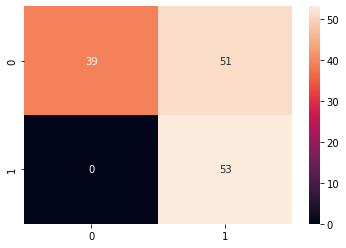

****************************************************************************************************
              precision    recall  f1-score   support

       생존(0)       0.83      1.00      0.91        90
       사망(1)       1.00      0.66      0.80        53

    accuracy                           0.87       143
   macro avg       0.92      0.83      0.85       143
weighted avg       0.90      0.87      0.87       143



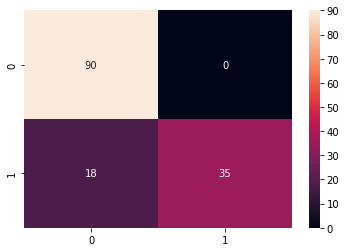

****************************************************************************************************


In [19]:
def threshhold_matrix(y_test, y_pred):   
    target_names = ['생존(0)', '사망(1)']
    cm = confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred, target_names=target_names))
    sns.heatmap(cm, annot = True, fmt="d"); plt.show()
    print('*'*100)

threshhold_matrix(y_test, y_pred[:,4])
threshhold_matrix(y_test, y_pred[:,140])

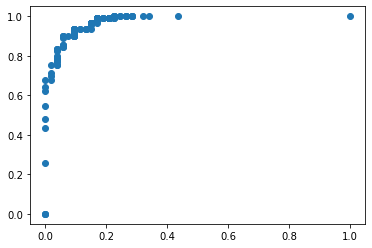

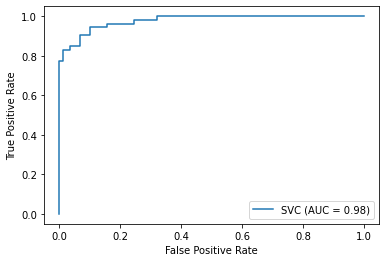

In [20]:
tpr = []; fpr = []
for i in range(n):
    cm = confusion_matrix(y_test, y_pred[:,i])
    tpr.append(cm[0,0]/cm.sum(axis=1)[0])
    fpr.append(cm[1,0]/cm.sum(axis=1)[1])
plt.scatter(fpr, tpr); plt.show()

from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf, X_test, y_test)  

In [24]:
((clf.predict_proba(X_test)[:,1] >= 0.3) == y_test).mean()
((clf.predict_proba(X_test)[:,1] >= 0.5) == y_test).mean()
((clf.predict_proba(X_test)[:,1] >= 0.8) == y_test).mean()

0.9090909090909091

0.9230769230769231

0.916083916083916

### roc_auc_score 
#### roc 아래의 면적 / 넓으면(1에 가까우면) 좋음

In [25]:
from sklearn.metrics import roc_auc_score
y_score = clf.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_score)

0.9775681341719078

### precision_recall_curve
#### th 변화에 따른 두 값의 변화

### average_precision_score

In [26]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)
print(f'Average precision-recall score: {average_precision:0.2f}')

Average precision-recall score: 0.97


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.97')

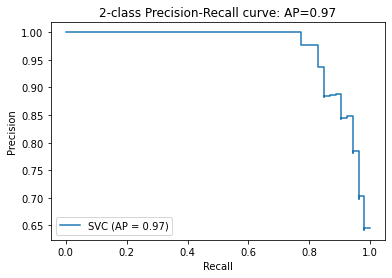

In [27]:
from sklearn.metrics import plot_precision_recall_curve, average_precision_score
disp = plot_precision_recall_curve(clf, X_test, y_test)
disp.ax_.set_title(f'2-class Precision-Recall curve: AP={average_precision:0.2f}')

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

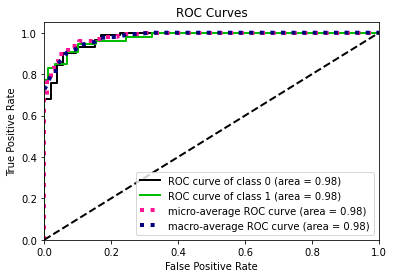

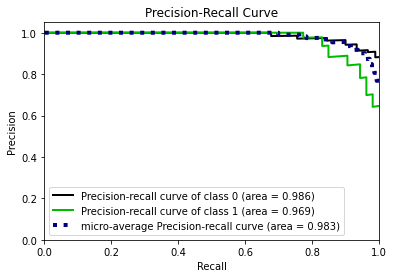

In [28]:
import scikitplot as skplt 
skplt.metrics.plot_roc(y_test, y_probas)
skplt.metrics.plot_precision_recall(y_test, y_probas)

In [29]:
from sklearn.metrics import precision_recall_curve

def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

precisions, recalls, thresholds = precision_recall_curve(y_test, y_probas[:, 1])
scores = [np.sum(to_labels(y_probas[:, 1], t))/len(y_probas[:, 1]) for t in thresholds]

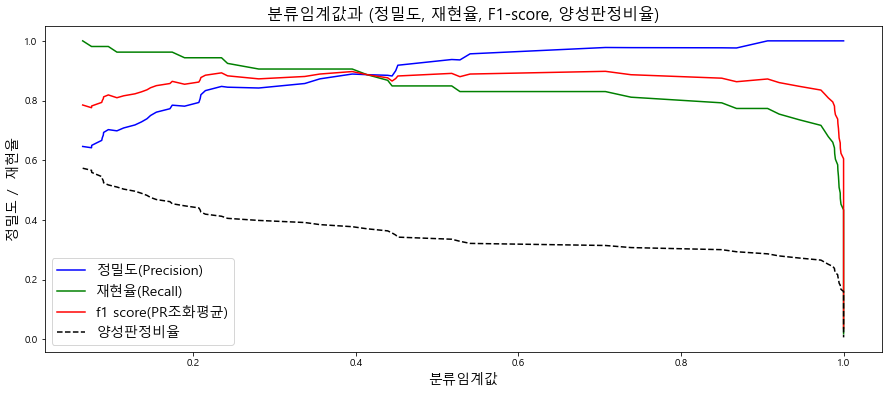

In [30]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): 
    plt.rcParams["figure.figsize"] = (15,6)
    plt.rcParams['font.family']='Malgun Gothic' # 한글폰트
    plt.title('분류임계값과 (정밀도, 재현율, F1-score, 양성판정비율)', fontsize='16') 
    plt.plot(thresholds, precisions[:-1], 'b-', label='정밀도(Precision)') # 판사
    plt.plot(thresholds, recalls[:-1], 'g-', label='재현율(Recall)') # 검사
    plt.plot(thresholds, (2*precisions[:-1]*recalls[:-1])/(precisions[:-1] +recalls[:-1]), 
             'r-', label='f1 score(PR조화평균)') # 변호사
    plt.plot(thresholds, scores, 'k--', label='양성판정비율') # q-ratio
    plt.ylabel('정밀도 /  재현율', fontsize='14') 
    plt.xlabel('분류임계값', fontsize='14') 
    plt.legend(loc='best', fontsize='14') 
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

## f1-score가 최대인 threshold?

In [31]:
from sklearn.metrics import f1_score
scores = [f1_score(y_test, to_labels(y_probas[:, 1], t)) for t in thresholds]
ix = np.argmax(scores)
print(f'Threshold(분류임계값)={thresholds[ix]:.3f}, at Maximum F-measure={scores[ix]:.3f}')

Threshold(분류임계값)=0.707, at Maximum F-measure=0.898


### plot_lift_curve / plot_cumulative_gain
- lift: the ratio between the results obtained with and without the predictive model
- cumulative_gain: percentage of the overall number of cases in a given category "gained" by targeting a percentage of the total number of cases

In [32]:
plt.rcParams["figure.figsize"] = (4,4)

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

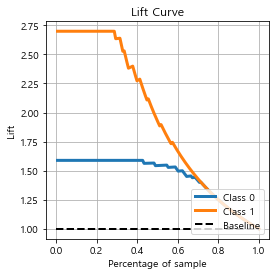

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

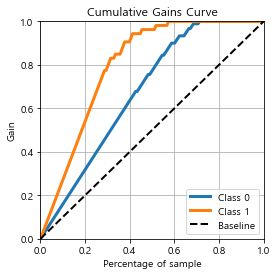

In [33]:
skplt.metrics.plot_lift_curve(y_test, y_probas); plt.show()
skplt.metrics.plot_cumulative_gain(y_test, y_probas)

## 1.1.3. Probalistic Metrics

### brier_score_loss
#### mean square error 값과 동일

In [34]:
from sklearn.metrics import brier_score_loss
brier_score_loss(y_test, y_score)
brier_score_loss(y_test, y_probas[:, 1])

0.05393556118435772

0.05393556118435772

### log_loss
- Log Loss is the negative average of the log of corrected predicted probabilities for each instance
- 예측된 확률과 실제값의 차이의 log 값은 1에 가까울 수록 0에 근접
<img src ='https://editor.analyticsvidhya.com/uploads/90149Capture0.PNG'>

### matthews_corrcoef
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/33f3d62224f97cdef8bc559ee455c3f4815f5788">

- MCC is defined identically to Pearson's phi coefficient
- unbalanced 상황에서 잘 맞음

### cohen_kappa_score
- Cohen's kappa measures the agreement between two raters
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/1a7a8f738ea187a60443bac93cd53b4d9d6b2231">

# End